___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

**Use pandas to read in the bank_note_data.csv file**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('bank_note_data.csv')

**Check the head of the Data**

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

**Import seaborn and set matplolib inline for viewing**

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Create a Countplot of the Classes (Authentic 1 vs Fake 0)**

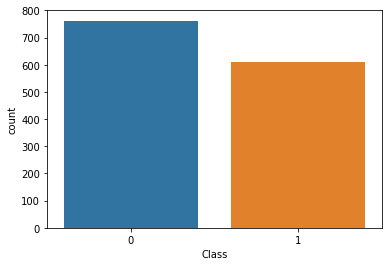

In [5]:
sns.countplot(df.Class)

**Create a PairPlot of the Data with Seaborn, set Hue to Class**

/home/karthikeyan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/karthikeyan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


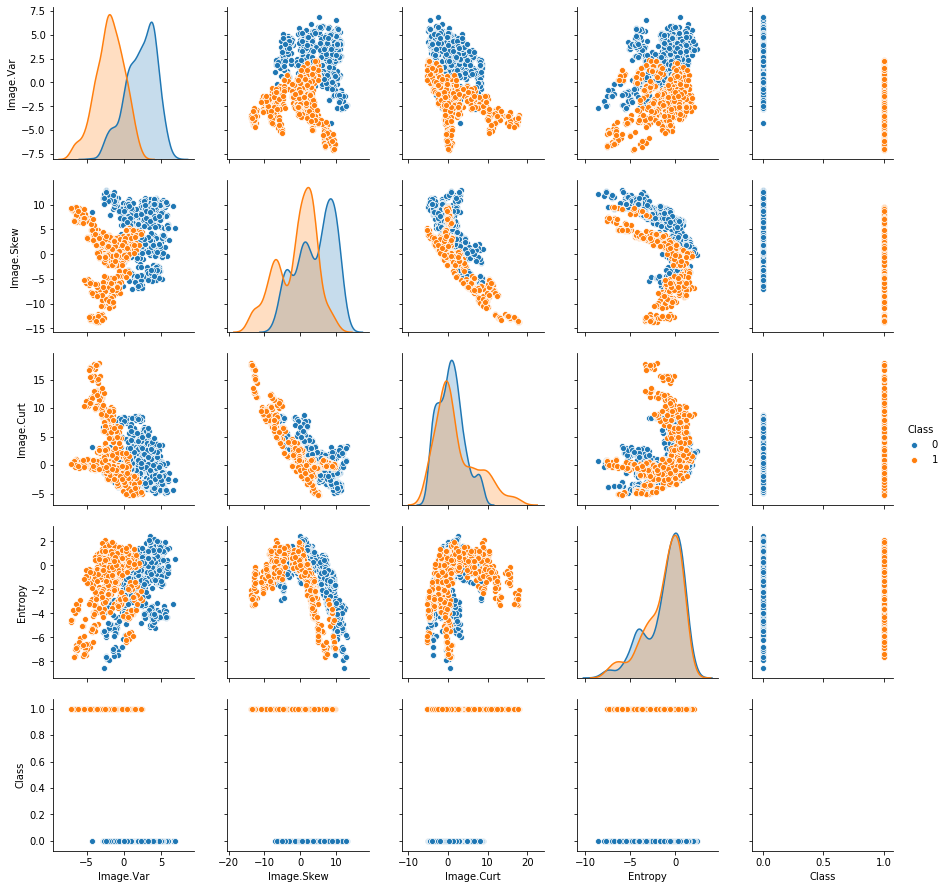

In [6]:
sns.pairplot(df , hue = 'Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [7]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [8]:
scalar = StandardScaler()

**Fit scaler to the features.**

In [9]:
scalar.fit(df.drop('Class' , axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [10]:
scaled = scalar.transform(df.drop('Class' , axis = 1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [11]:
scaled = pd.DataFrame(scaled , columns=[ 'Image.Var' , 'Image.Skew' , 'Image.Curt' , 'Entropy'])

In [12]:
scaled.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

**Create two objects X and y which are the scaled feature values and labels respectively.**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = scaled
y = df['Class']

**Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Tensorflow

In [16]:
import tensorflow as tf

/home/karthikeyan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/karthikeyan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/karthikeyan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/karthikeyan/anaconda3/lib/python3.7/site-packages/tensorflow/

**Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [17]:
feat_cols = list()

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [18]:
feat_cols

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [19]:
feat_cols[0]

NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [20]:
y.value_counts() #FOr n_classes arg value in DNN classifier

0    762
1    610
Name: Class, dtype: int64

**Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [21]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10 , 20 , 10] , n_classes=2 , feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmplfurvqr5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f63a36970b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big.**

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train , y = y_train , batch_size=20  , shuffle=True)

**Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [23]:
classifier.train(input_fn=input_func , steps=500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmplfurvqr5/model.ckpt.
INFO:tensorflow:loss = 12.746942, step = 1
INFO:tensorflow:Saving checkpoints for 46 into /tmp/tmplfurvqr5/model.ckpt.
INFO:tensorflow:Loss for final step: 1.2835466.


## Model Evaluation

**Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [24]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

**Use the predict method from the classifier model to create predictions from X_test**

In [25]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmplfurvqr5/model.ckpt-46
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [26]:
note_predictions[0]

{'logits': array([-7.7019134], dtype=float32),
 'logistic': array([0.00045171], dtype=float32),
 'probabilities': array([9.9954826e-01, 4.5175743e-04], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object)}

In [27]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [28]:
final_preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,


**Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [29]:
from sklearn.metrics import confusion_matrix as cf , classification_report as cr

In [30]:
print(cf(y_test , final_preds))

[[257   0]
 [  1 195]]


In [31]:
print(cr(y_test , final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      0.99      1.00       196

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



## Optional Comparison

**You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier(n_estimators=200)

In [34]:
model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
predictions = model.predict(X_test)

In [36]:
print(cr(y_test , predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       257
           1       1.00      0.98      0.99       196

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



In [37]:
print(cf(y_test , predictions))

[[257   0]
 [  3 193]]


**It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN!**

# Great Job!